In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [6]:
df.drop(['Time'], axis=1, inplace=True)

In [7]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(284807, 30)
(275663, 30)


In [8]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [14]:
#Decision Tree

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

Accuracy score of the Decision Tree model is 0.9991583957281328
F1 score of the Decision Tree model is 0.7521367521367521


array([[68770,    18],
       [   40,    88]], dtype=int64)

In [13]:
#Decision Tree

DT = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

Accuracy score of the Decision Tree model is 0.999288989494457
F1 score of the Decision Tree model is 0.7896995708154506


array([[68775,    13],
       [   36,    92]], dtype=int64)

In [9]:
#K-Nearest Neighbors

n = 3
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))
confusion_matrix(y_test, knn_yhat, labels = [0, 1])

Accuracy score of the K-Nearest Neighbors model is 0.9994486040977422
F1 score of the K-Nearest Neighbors model is 0.831858407079646


array([[68784,     4],
       [   34,    94]], dtype=int64)

In [10]:
#K-Nearest Neighbors

n = 5
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))
confusion_matrix(y_test, knn_yhat, labels = [0, 1])

Accuracy score of the K-Nearest Neighbors model is 0.9993325207498984
F1 score of the K-Nearest Neighbors model is 0.8034188034188035


array([[68776,    12],
       [   34,    94]], dtype=int64)

In [15]:
#K-Nearest Neighbors

n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))
confusion_matrix(y_test, knn_yhat, labels = [0, 1])

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457
F1 score of the K-Nearest Neighbors model is 0.7949790794979079


array([[68772,    16],
       [   33,    95]], dtype=int64)

In [16]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
confusion_matrix(y_test, lr_yhat, labels = [0, 1])

Accuracy score of the Logistic Regression model is 0.9989552498694062
F1 score of the Logistic Regression model is 0.6666666666666666


array([[68772,    16],
       [   56,    72]], dtype=int64)

In [17]:
#Support Vector Machines

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))
confusion_matrix(y_test, svm_yhat, labels = [0, 1])

Accuracy score of the Support Vector Machines model is 0.999318010331418
F1 score of the Support Vector Machines model is 0.7813953488372093


array([[68785,     3],
       [   44,    84]], dtype=int64)

In [18]:
#Random Forest

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))
confusion_matrix(y_test, rf_yhat, labels = [0, 1])

Accuracy score of the Random Forest model is 0.9991583957281328
F1 score of the Random Forest model is 0.7314814814814815


array([[68779,     9],
       [   49,    79]], dtype=int64)

In [11]:
#XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

Accuracy score of the XGBoost model is 0.999506645771664
F1 score of the XGBoost model is 0.8495575221238937


array([[68786,     2],
       [   32,    96]], dtype=int64)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,133
Trainable params: 2,133
Non-trainabl

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
6892/6892 [==============================] - 15s 2ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 2/5
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 3/5
6892/6892 [==============================] - 14s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 4/5
6892/6892 [==============================] - 14s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/5
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0029 - accuracy: 0.9994


In [11]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2154/2154 [==============================] - 3s 1ms/step - loss: 0.0041 - accuracy: 0.9992
Test Accuracy: 99.92%
Test Loss: 0.00409175269305706


2154/2154 [==============================] - 3s 1ms/step


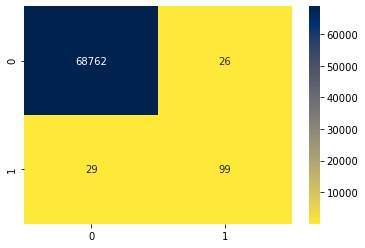

In [13]:
import seaborn as sns
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

In [14]:
model_ = Sequential([
    Dense(units=10, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=20,activation='relu'),
    Dropout(0.5),
    Dense(units=27,activation='relu'),
    Dense(units=30,activation='relu'),
    Dense(1, activation='sigmoid')
])
model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                300       
                                                                 
 dense_6 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 27)                567       
                                                                 
 dense_8 (Dense)             (None, 30)                840       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,958
Trainable params: 1,958
Non-traina

In [15]:
model_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0112 - accuracy: 0.9986
Epoch 2/5
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
6892/6892 [==============================] - 14s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9994


In [16]:
score = model_.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2154/2154 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9992
Test Accuracy: 99.92%
Test Loss: 0.004038030747324228


2154/2154 [==============================] - 3s 1ms/step


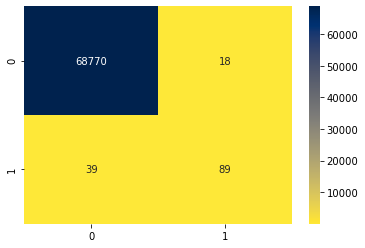

In [17]:
y_pred = model_.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()